In [1]:
!pip install dionysus
!pip install teaspoon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 32.7 MB/s 
  Created wheel for dionysus: filename=dionysus-2.0.8-cp38-cp38-linux_x86_64.whl size=319865 sha256=d8978bf88827b2c50fefdaa38ec869e9dc49071014f376f6c9f6c95e4d1fb603
  Stored in directory: /root/.cache/pip/wheels/0e/6a/ce/a54c9248873852edfaf8e6e801db84c2d2c64f797fc07a68da
Successfully built dionysus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 28.4 MB/s 


In [2]:
!pip install ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 4.6 MB/s 
  Created wheel for ripser: filename=ripser-0.6.4-cp38-cp38-linux_x86_64.whl size=458210 sha256=6bed6673ba87449f2a356fa18404e8d152537442fdc78293fc725d5d816533c6
  Stored in directory: /root/.cache/pip/wheels/2a/91/ce/d7deed9ae6fb975821947c9aaa86134c95d2fe3f4b0f89b59e
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18119 sha256=8acaf2f8590de8b9e73f99b65c560ac334d3ca1ae70585d3e4b6dc2037268ab7
  Stored in directory: /root/.cache/pip/wheels/fb/f7/29/5c31600b478c23a3793be7cea9889d5eccb1e7ef40fef5e34e
Successfully built ripser hopcroftkarp


In [3]:
from __future__ import print_function   # if you are using Python 2

import dionysus as d
import numpy as np
import matplotlib.pyplot as plt
from teaspoon.TDA.Draw import drawDgm
from teaspoon.TDA.BuZZ import PtClouds
from teaspoon.SP.tsa_tools import takens

In [11]:
t = np.linspace(0, 6*np.pi+1, 50)

# Amplitudes of sine waves
amps = [0.1,0.5,1,1.5,2,1.5,1,0.5,0.1]

ts_list = []
ptcloud_list = []
for a in amps[0:1]:
    y = a*np.sin(t) + (0.1*np.random.randint(-100,100,len(t))/100)
    print (np.shape(takens(y, n=2, tau=4)))
    # Compute sine wave and add noise uniformly distributed in [-0.1, 0.1]
    ts_list.append(y)

    # Compute time delay embedding point clouds
    ptcloud_list.append(takens(y, n=2, tau=4))

(46, 2)


/usr/local/lib/python3.8/dist-packages/teaspoon/TDA/BuZZ.py:47: UserWarning: Complex type not recognized. Setting to rips by default.
  warnings.warn(


Point Cloud
---
ptclouds_full :                                              PtCloud
0  [[0.045, 0.14087713823436693], [0.028410421496...
1  [[0.014000000000000002, 0.5513856911718347], [...
2  [[-0.075, 0.9937713823436692], [0.359104214961...
3  [[-0.049, 1.574157073515504], [0.5081563224423...
4  [[0.063, 1.9365427646873385], [0.8322084299231...
5  [[-0.083, 1.4241570735155038], [0.536156322442...
6  [[0.032, 1.0497713823436692], [0.4341042149615...
7  [[0.07300000000000001, 0.40438569117183465], [...
8  [[0.063, 0.18187713823436696], [0.132410421496...
ptclouds :                                              PtCloud
0  [[-0.07289887917302916, -0.10289605476907683],...
1  [[0.12605210748078083, 0.3742033164200932], [-...
2  [[0.36319138225847397, -0.9923177693434148], [...
3  [[1.402152873896776, -0.4336297459029813], [-1...
4  [[-0.8723932826697743, -1.6469108419218323], [...
5  [[-0.4926297459029813, -1.3395809232732878], [...
6  [[0.8031019818139132, -0.49569664133488717], [...
7  

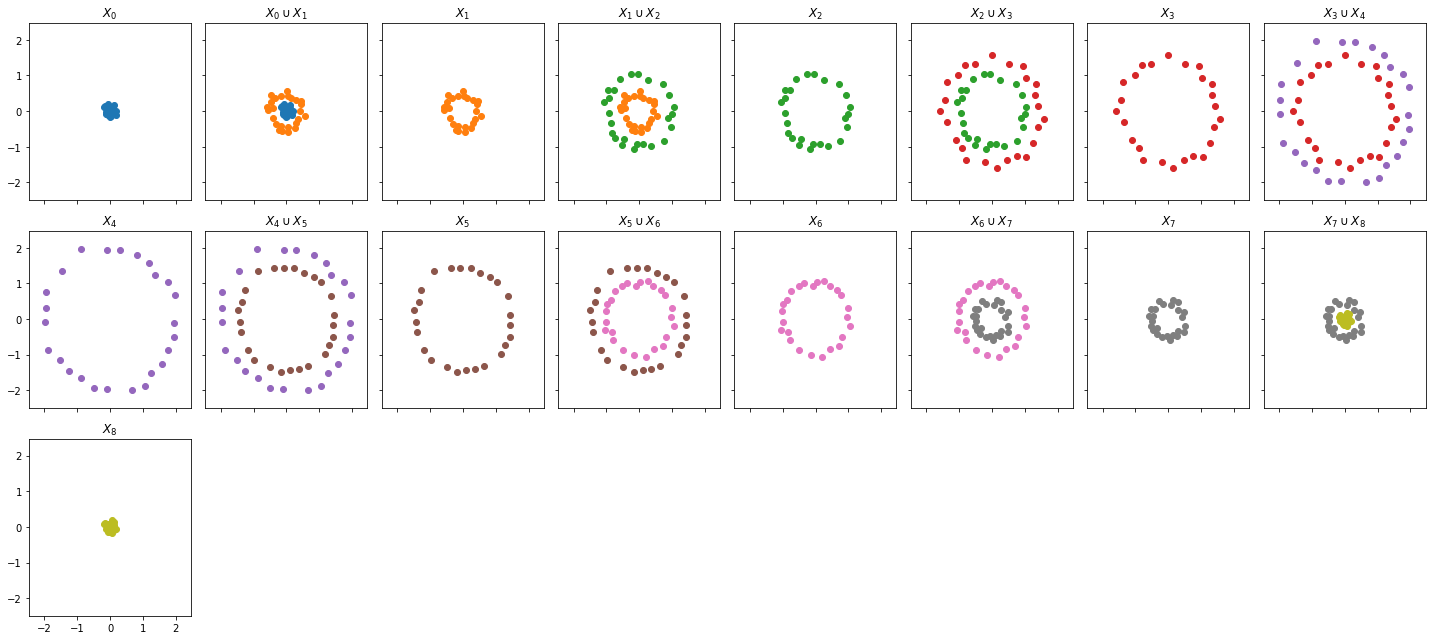

In [5]:
# Setup zigzag with point clouds
ZZ = PtClouds(ptcloud_list, num_landmarks=25, verbose=True, cplx_type = 'lower_star')

print (ZZ)
# Plot zigzag of point clouds
ZZ.plot_ZZ_PtClouds()

Initializing done in 0.023442506790161133 seconds...
Preprocessing done in 5.241349697113037 seconds...
Time to build filtration, times:  5.304110050201416
Time to compute zigzag:  117.13351535797119
Total Time:  122.43871593475342 



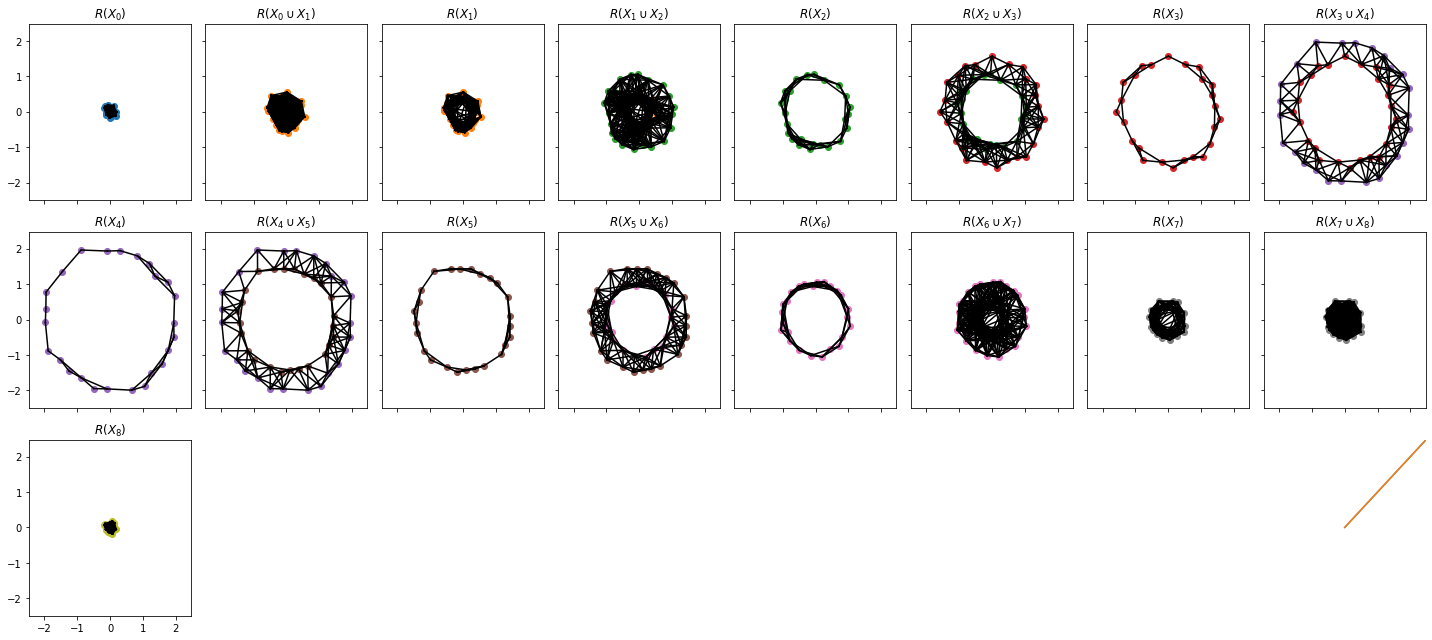

In [6]:
# Compute zigzag persistence
ZZ.run_Zigzag(r=0.85)

# Plot zigzag of Rips complexes
ZZ.plot_ZZ_Cplx()

# Plot zigzag persistence diagram
drawDgm(ZZ.zz_dgms[0]) # 0-dimensional diagram
drawDgm(ZZ.zz_dgms[1]) # 1-dimensional diagram

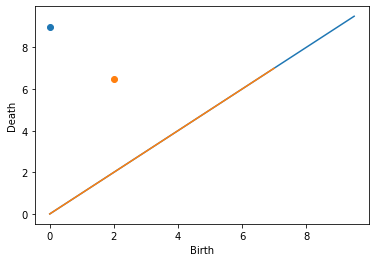

In [7]:
drawDgm(ZZ.zz_dgms[0]) # 0-dimensional diagram
drawDgm(ZZ.zz_dgms[1]) # 1-dimensional diagram